# Table of Contents
 <p><div class="lev1"><a href="#imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></div><div class="lev1"><a href="#setup-lalsim-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>setup lalsim function</a></div><div class="lev1"><a href="#setup-phenom-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>setup phenom function</a></div><div class="lev3"><a href="#calling-the-approximant-directly-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>calling the approximant directly</a></div><div class="lev3"><a href="#calling-the-approximant-through-the-waveform-class-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>calling the approximant through the waveform class</a></div><div class="lev2"><a href="#comparisons-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>comparisons</a></div><div class="lev3"><a href="#calling-the-approximant-directly-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>calling the approximant directly</a></div><div class="lev3"><a href="#calling-the-approximant-through-the-Waveform-class-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>calling the approximant through the Waveform class</a></div><div class="lev1"><a href="#example-using-MakeWaveformSeries-for-phenom-and-LAL-waveforms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>example using MakeWaveformSeries for phenom and LAL waveforms</a></div>

# imports

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import phenom
from phenom.utils.utils import Constants

# setup lalsim function

In [25]:
import lal
import lalsimulation as lalsim

In [4]:
m1 = 8.
m2 = 8.
chi1x = 0.9
chi1z = 0.
chi2z = 0.
f_min = 10.
fRef = 0.
inclination = 0.
_lshp, _lshc = lalsim.SimInspiralChooseFDWaveform(0, 1./64.,
                                                m1*lal.MSUN_SI, m2*lal.MSUN_SI,
                                                chi1x, 0, chi1z,
                                                0, 0, chi2z,
                                                f_min, 0, fRef,
                                                1e6*phenom.Constants.PC_SI,
                                                inclination,
                                                0, 0,
                                                None, None,
                                                -1, -1,
                                                lalsim.IMRPhenomPv2)

lsf = (np.arange(_lshp.data.length) * _lshp.deltaF)
lshp = (_lshp.data.data)
lshc = (_lshc.data.data)

(10, 2000)

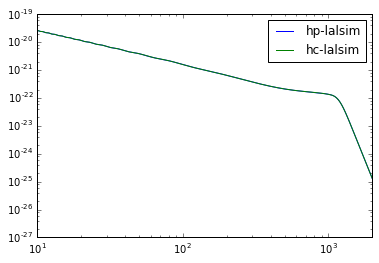

In [5]:
plt.figure()
# plt.plot(fl_Hz, np.abs(phenp.hp), label='hp')
plt.plot(lsf, np.abs(lshp), label='hp-lalsim')
plt.plot(lsf, np.abs(lshc), label='hc-lalsim')
# plt.plot(fl_Hz, np.abs(phenp.hc), label='hc')
# plt.plot(fl_Hz, np.abs(phenp.hP), label='h_aligned')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,2000)
# plt.savefig('lal_phenp_1.png')
# plt.close()

# setup phenom function

### calling the approximant directly

In [6]:
input_params = {}
input_params.update({'m1' : m1})
input_params.update({'m2' : m2})
input_params.update({'chi1x' : chi1x})
input_params.update({'chi1z' : chi1z})
input_params.update({'chi2z' : chi2z})
input_params.update({'f_min' : f_min})
input_params.update({'fRef' : fRef})
input_params.update({'inclination' : inclination})

phenp = phenom.PhenomP(**input_params)

In [7]:
fl_Hz = np.arange(phenp.p['f_min'], phenp.p['f_max'], phenp.p['delta_f'])

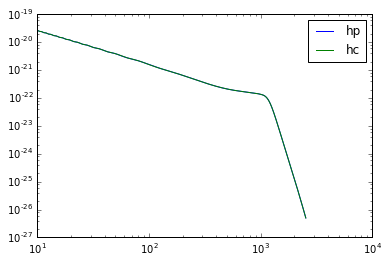

In [8]:
plt.figure()
plt.plot(fl_Hz, np.abs(phenp.hp), label='hp')
plt.plot(fl_Hz, np.abs(phenp.hc), label='hc')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')

### calling the approximant through the waveform class

In [9]:
input_params = {}
input_params.update({'m1' : m1})
input_params.update({'m2' : m2})
input_params.update({'chi1x' : chi1x})
input_params.update({'chi1z' : chi1z})
input_params.update({'chi2z' : chi2z})
input_params.update({'f_min' : f_min})
input_params.update({'fRef' : fRef})
input_params.update({'inclination' : inclination})

phenp = phenom.Waveform(approximant="IMRPhenomPv2_LAL", **input_params)

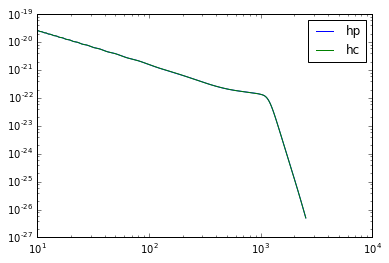

In [10]:
plt.figure()
plt.plot(phenp.flist_Hz, np.abs(phenp.hptilde), label='hp')
plt.plot(phenp.flist_Hz, np.abs(phenp.hctilde), label='hc')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')

## comparisons

### calling the approximant directly

In [11]:
def compare_with_lal(m1=8., m2=8., chi1x=0.9, chi1z=0., chi2z=0., fmin=10., fRef=0., inclination=0.):

    #compute lal
    _lshp, _lshc = lalsim.SimInspiralChooseFDWaveform(0, 1./64.,
                                                    m1*lal.MSUN_SI, m2*lal.MSUN_SI,
                                                    chi1x, 0, chi1z,
                                                    0, 0, chi2z,
                                                    f_min, 0, fRef,
                                                    1e6*phenom.Constants.PC_SI,
                                                    inclination,
                                                    0, 0,
                                                    None, None,
                                                    -1, -1,
                                                    lalsim.IMRPhenomPv2)

    lsf = (np.arange(_lshp.data.length) * _lshp.deltaF)
    lshp = (_lshp.data.data)
    lshc = (_lshc.data.data)
    #compute phenom
    input_params = {}
    input_params.update({'m1' : m1})
    input_params.update({'m2' : m2})
    input_params.update({'chi1x' : chi1x})
    input_params.update({'chi1z' : chi1z})
    input_params.update({'chi2z' : chi2z})
    input_params.update({'f_min' : f_min})
    input_params.update({'fRef' : fRef})
    input_params.update({'inclination' : inclination})

    phenp = phenom.PhenomP(**input_params)
    fl_Hz = np.arange(phenp.p['f_min'], phenp.p['f_max'], phenp.p['delta_f'])
    
    plt.figure()
    plt.plot(fl_Hz, np.abs(phenp.hp), label='hp')
    plt.plot(lsf, np.abs(lshp), label='hp-lalsim')
#     plt.plot(fl_Hz, np.abs(phenp.hc), label='hc')
    plt.legend(loc='best')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(10,2000)

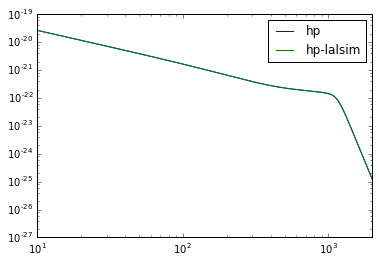

In [12]:
compare_with_lal(chi1x=0.01)

### calling the approximant through the Waveform class

In [13]:
def compare_with_lal(m1=8., m2=8., chi1x=0.9, chi1z=0., chi2z=0., fmin=10., fRef=0., inclination=0.):

    #compute lal
    _lshp, _lshc = lalsim.SimInspiralChooseFDWaveform(0, 1./64.,
                                                    m1*lal.MSUN_SI, m2*lal.MSUN_SI,
                                                    chi1x, 0, chi1z,
                                                    0, 0, chi2z,
                                                    f_min, 0, fRef,
                                                    1e6*phenom.Constants.PC_SI,
                                                    inclination,
                                                    0, 0,
                                                    None, None,
                                                    -1, -1,
                                                    lalsim.IMRPhenomPv2)

    lsf = (np.arange(_lshp.data.length) * _lshp.deltaF)
    lshp = (_lshp.data.data)
    lshc = (_lshc.data.data)
    #compute phenom
    input_params = {}
    input_params.update({'m1' : m1})
    input_params.update({'m2' : m2})
    input_params.update({'chi1x' : chi1x})
    input_params.update({'chi1z' : chi1z})
    input_params.update({'chi2z' : chi2z})
    input_params.update({'f_min' : f_min})
    input_params.update({'fRef' : fRef})
    input_params.update({'inclination' : inclination})

    phenp = phenom.Waveform(approximant="IMRPhenomPv2_LAL", **input_params)

    
    plt.figure()
    plt.plot(phenp.flist_Hz, np.abs(phenp.hptilde), label='hp')
    plt.plot(lsf, np.abs(lshp), label='hp-lalsim')
#     plt.plot(fl_Hz, np.abs(phenp.hc), label='hc')
    plt.legend(loc='best')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(10,2000)

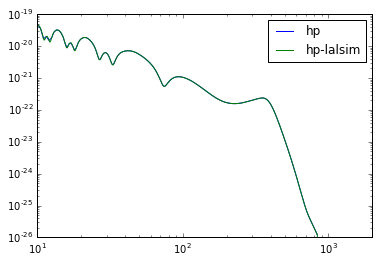

In [14]:
compare_with_lal(chi1x=0.9, m1=40.42)

# example using MakeWaveformSeries for phenom and LAL waveforms

In [5]:
wf1 = phenom.Waveform(approximant="IMRPhenomPv2_LAL")

In [6]:
wf1.input_params

{'approximant': 'IMRPhenomPv2_LAL',
 'chi1x': 0.0,
 'chi1y': 0.0,
 'chi1z': 0.0,
 'chi2x': 0.0,
 'chi2y': 0.0,
 'chi2z': 0.0,
 'delta_f': 0.5,
 'delta_t': 0.5,
 'distance': 3.085677581491367e+22,
 'fRef': 0.0,
 'f_max': 0.0,
 'f_min': 30.0,
 'inclination': 0.0,
 'm1': 50.0,
 'm2': 50.0,
 'phiRef': 0.0}

In [7]:
_lshp, _lshc = lalsim.SimInspiralChooseFDWaveform(0, wf1.input_params['delta_f'],
                                                wf1.input_params['m1']*lal.MSUN_SI,
                                                wf1.input_params['m2']*lal.MSUN_SI,
                                                wf1.input_params['chi1x'], 0, wf1.input_params['chi1z'],
                                                0, 0, wf1.input_params['chi2z'],
                                                wf1.input_params['f_min'], 0, wf1.input_params['fRef'],
                                                1e6*phenom.Constants.PC_SI,
                                                wf1.input_params['inclination'],
                                                0, 0,
                                                None, None,
                                                -1, -1,
                                                lalsim.IMRPhenomPv2)

lsf = (np.arange(_lshp.data.length) * _lshp.deltaF)
lshp = (_lshp.data.data)
lshc = (_lshc.data.data)

In [8]:
ws1 = phenom.MakeWaveformSeries(wf1.flist_Hz, wf1.hptilde, wf1.hctilde)
lal_ws = phenom.MakeWaveformSeries(lsf, lshp, lshc)

In [9]:
match = phenom.Match()

In [10]:
match.match(ws1, lal_ws)

0.99999999999635447